In [ ]:
# import hr dataset with pandas
from google.colab import files

df = files.upload()

Saving fed_funds_rate_with_predictions.csv to fed_funds_rate_with_predictions.csv


In [ ]:
import pandas as pd

# Load data
df = pd.read_csv('fed_funds_rate_with_predictions.csv', parse_dates=['date'])

print(df.info())
print(df.describe())
print(df['date'].min(), df['date'].max())
print(df.isnull().sum())  # Check for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25692 entries, 0 to 25691
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        25692 non-null  datetime64[ns]
 1   SMA_filled  25692 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 401.6 KB
None
                      date    SMA_filled
count                25692  25692.000000
mean   1989-08-31 12:00:00      4.609452
min    1954-07-01 00:00:00      0.040000
25%    1972-01-30 18:00:00      1.820000
50%    1989-08-31 12:00:00      4.280000
75%    2007-04-02 06:00:00      6.220000
max    2024-11-01 00:00:00     22.360000
std                    NaN      3.588428
1954-07-01 00:00:00 2024-11-01 00:00:00
date          0
SMA_filled    0
dtype: int64


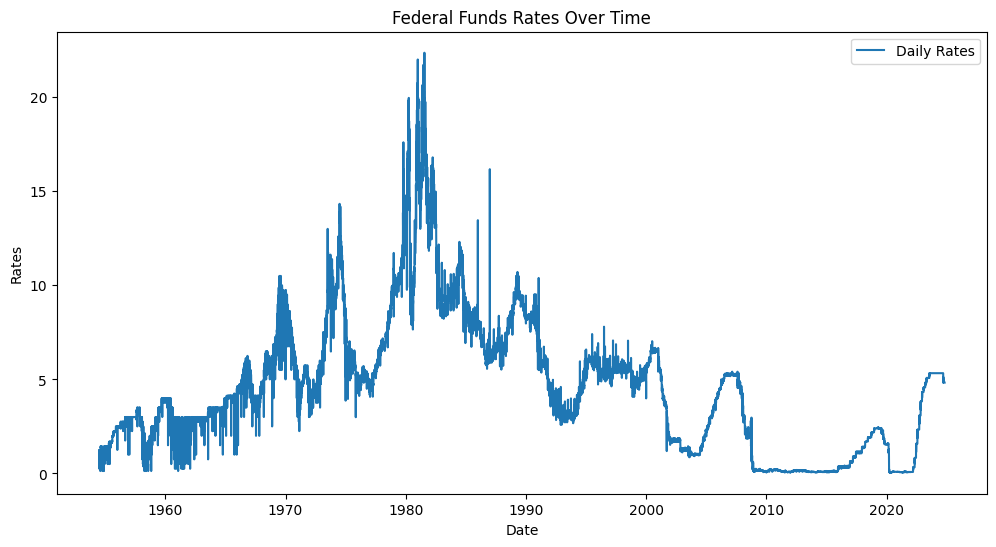

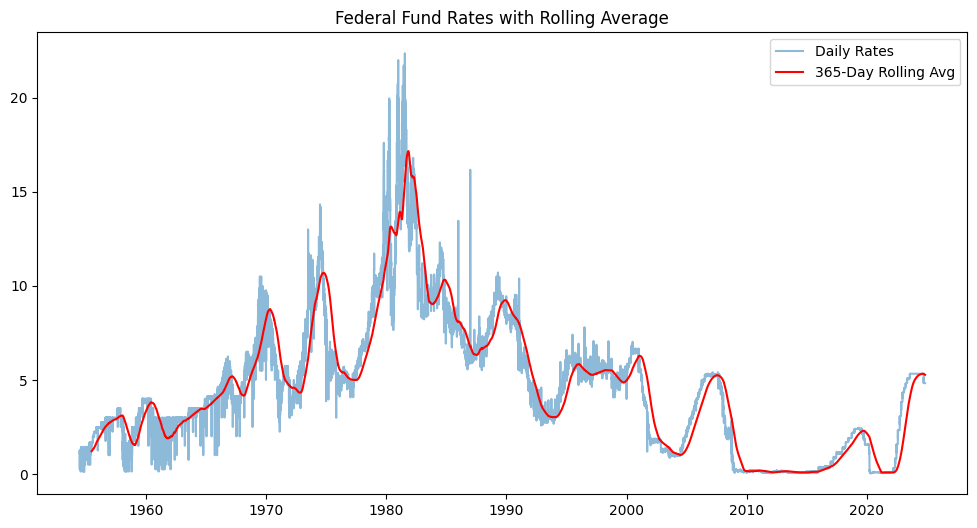

In [ ]:
import matplotlib.pyplot as plt

# Line plot
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['SMA_filled'], label='Daily Rates')
plt.title('Federal Funds Rates Over Time')
plt.xlabel('Date')
plt.ylabel('Rates')
plt.legend()
plt.show()

# Rolling average
df['Rates_Rolling_365'] = df['SMA_filled'].rolling(window=365).mean()
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['SMA_filled'], alpha=0.5, label='Daily Rates')
plt.plot(df['date'], df['Rates_Rolling_365'], color='red', label='365-Day Rolling Avg')
plt.title('Federal Fund Rates with Rolling Average')
plt.legend()
plt.show()


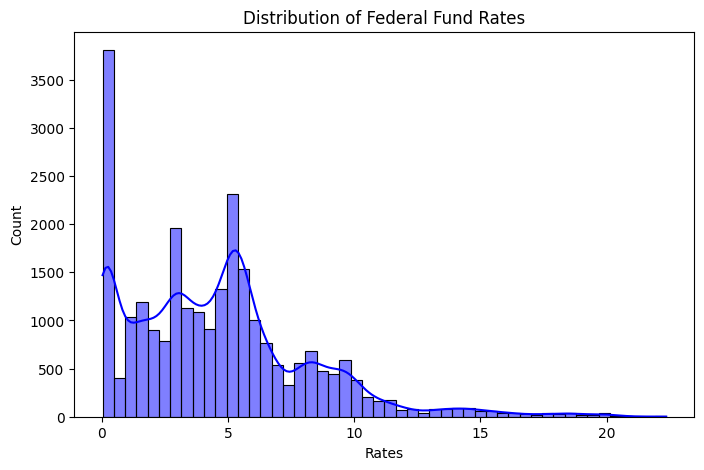

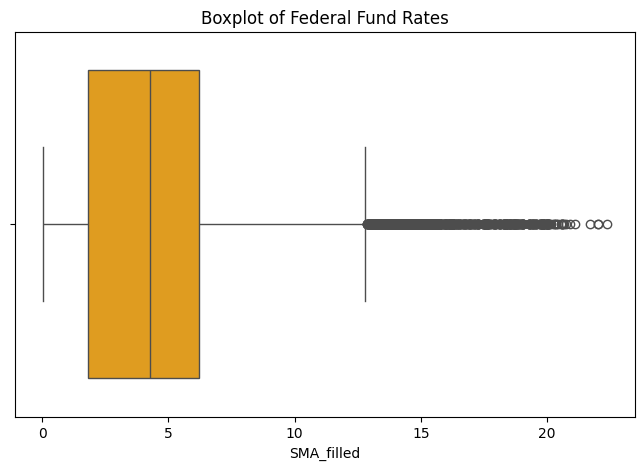

In [ ]:
import seaborn as sns

# Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df['SMA_filled'], bins=50, kde=True, color='blue')
plt.title('Distribution of Federal Fund Rates')
plt.xlabel('Rates')
plt.show()

# Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['SMA_filled'], color='orange')
plt.title('Boxplot of Federal Fund Rates')
plt.show()

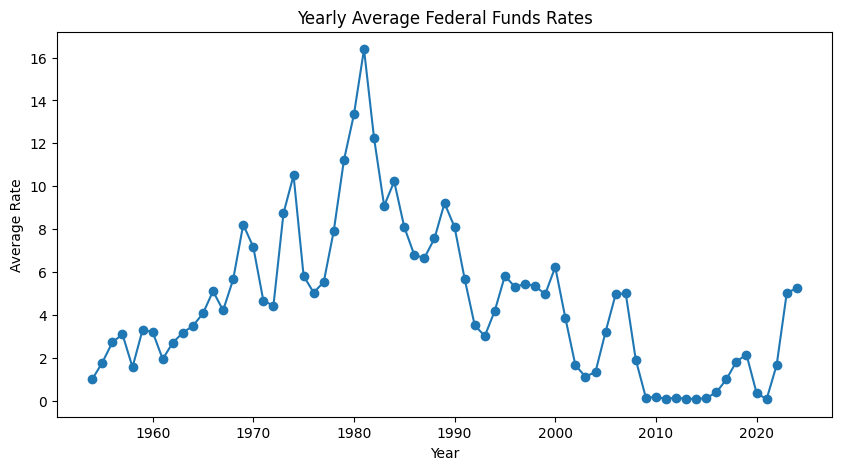

<ipython-input-8-984932fecfcd>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_avg.index, y=monthly_avg.values, palette='viridis')


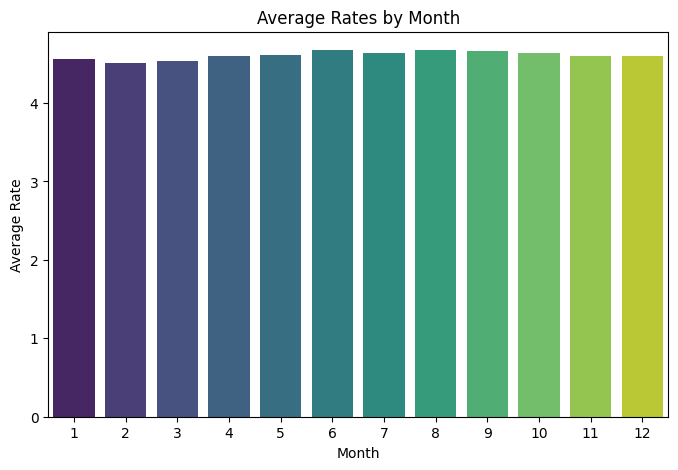

In [ ]:
# Extract Year and Month
df['Year'] = df['date'].dt.year
df['Month'] = df['date'].dt.month

# Yearly average rates
yearly_avg = df.groupby('Year')['SMA_filled'].mean()
plt.figure(figsize=(10, 5))
plt.plot(yearly_avg, marker='o')
plt.title('Yearly Average Federal Funds Rates')
plt.xlabel('Year')
plt.ylabel('Average Rate')
plt.show()

# Monthly trends
monthly_avg = df.groupby('Month')['SMA_filled'].mean()
plt.figure(figsize=(8, 5))
sns.barplot(x=monthly_avg.index, y=monthly_avg.values, palette='viridis')
plt.title('Average Rates by Month')
plt.xlabel('Month')
plt.ylabel('Average Rate')
plt.show()

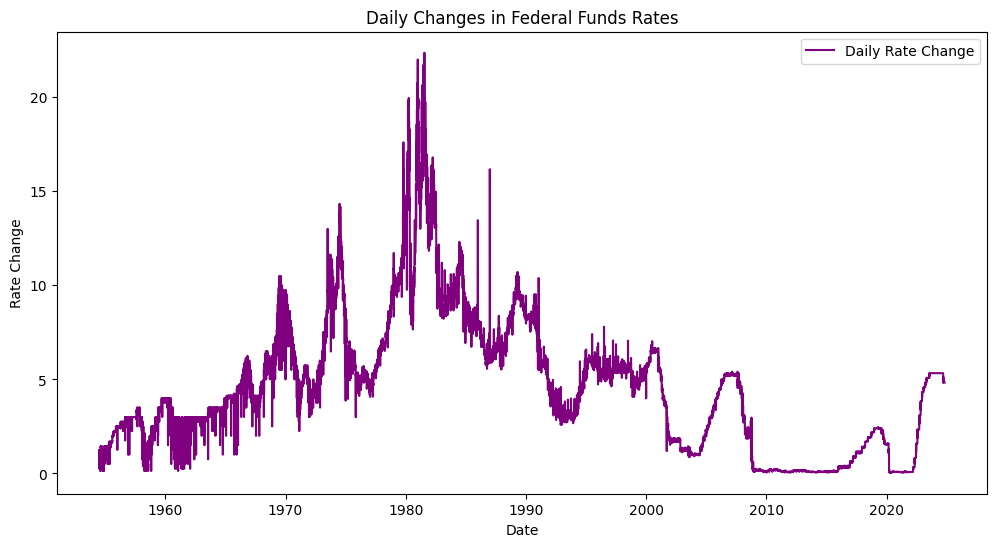

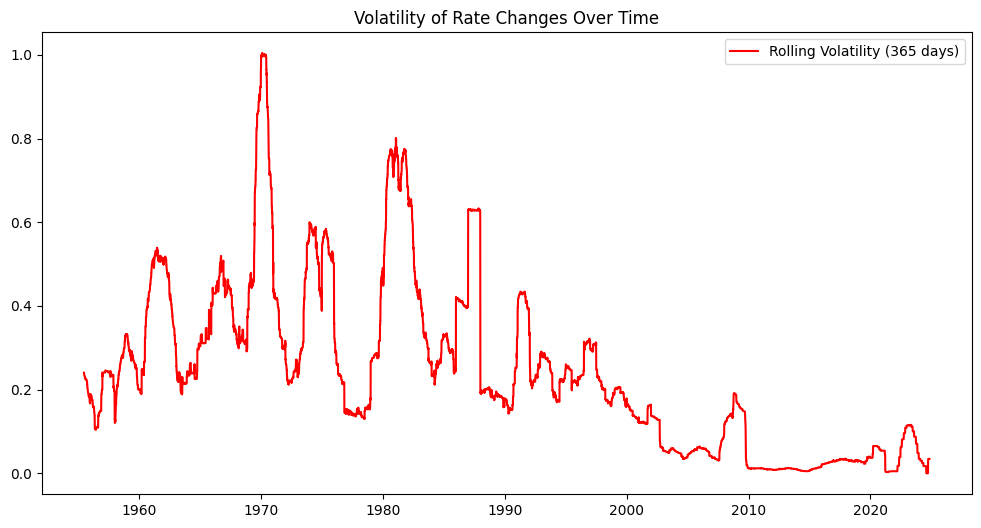

In [ ]:
# Daily changes
df['Rate_Change'] = df['SMA_filled'].diff()

# Plot rate changes
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['SMA_filled'], label='Daily Rate Change', color='purple')
plt.title('Daily Changes in Federal Funds Rates')
plt.xlabel('Date')
plt.ylabel('Rate Change')
plt.legend()
plt.show()

# Volatility analysis
volatility = df['Rate_Change'].rolling(window=365).std()
plt.figure(figsize=(12, 6))
plt.plot(df['date'], volatility, color='red', label='Rolling Volatility (365 days)')
plt.title('Volatility of Rate Changes Over Time')
plt.legend()
plt.show()

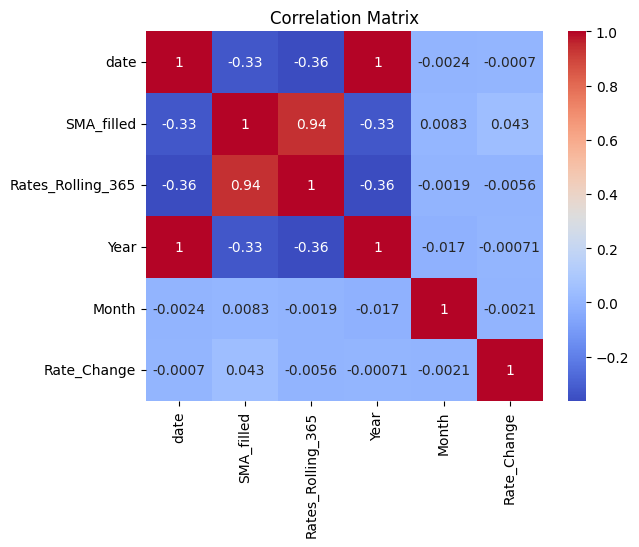

In [ ]:
# Correlation matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

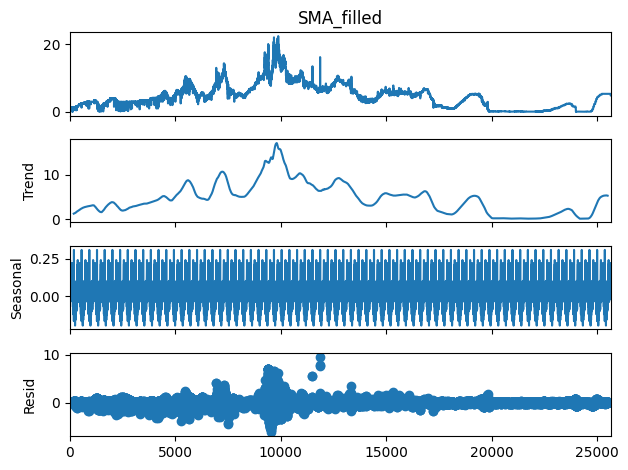

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition = seasonal_decompose(df['SMA_filled'], model='additive', period=365)
decomposition.plot()
plt.show()

In [ ]:
from scipy.stats import zscore

# Calculate Z-scores
df['Z_Score'] = zscore(df['SMA_filled'])
outliers = df[df['Z_Score'].abs() > 3]  # Threshold: 3

print("Outlier Days:", outliers)

Outlier Days:             date  SMA_filled  Rates_Rolling_365  Year  Month  Rate_Change  \
9244  1979-10-22       17.60          10.451808  1979     10         2.53   
9245  1979-10-23       15.65          10.469205  1979     10        -1.95   
9248  1979-10-26       16.01          10.515123  1979     10         0.79   
9249  1979-10-27       16.01          10.533918  1979     10         0.00   
9250  1979-10-28       16.01          10.552712  1979     10         0.00   
...          ...         ...                ...   ...    ...          ...   
10164 1982-04-29       15.89          15.743205  1982      4        -0.21   
10169 1982-05-04       15.94          15.688658  1982      5         0.67   
10170 1982-05-05       15.74          15.681397  1982      5        -0.20   
10177 1982-05-12       15.38          15.622767  1982      5         0.49   
11870 1986-12-30       16.17           6.797041  1986     12         7.79   

        Z_Score  
9244   3.620193  
9245   3.076769  
9248   

In [ ]:
df['Decade'] = (df['Year'] // 10) * 10
decade_stats = df.groupby('Decade')['SMA_filled'].agg(['mean', 'std', 'min', 'max'])

print(decade_stats)

            mean       std   min    max
Decade                                 
1950    2.364657  0.940664  0.13   4.00
1960    4.182981  1.828483  0.13  10.50
1970    7.106492  2.565207  2.25  17.60
1980    9.963876  3.426096  5.52  22.36
1990    5.144581  1.402209  2.58  10.39
2000    2.954377  2.006945  0.05   7.03
2010    0.613574  0.759342  0.04   2.45
2020    2.388553  2.327941  0.04   5.33
